# Стратегия взаимодействия с клиентами на основе аналитических данных для сети фитнес-центров «Культурист-датасаентист» .

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
   - выделить целевые группы клиентов;
   - предложить меры по снижению оттока;
   - определить другие особенности взаимодействия с клиентами.


### Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Прочитаем файл с данными

In [3]:
try:
    data = pd.read_csv('/Users/sergejnitkin/ML project/gym_churn.csv')
except:
    data = pd.read_csv('/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data.columns = data.columns.str.lower() # приведем все названия к нижнему регистру для удобства

### Изучим структуру данных

In [6]:
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Пропусков нет. О дубликатах тут судить сложно, поэтому оставим все как есть. Только поменяем колонку month_to_end_contract на целочисленный формат.

## Исследовательский анализ данных (EDA)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


### Теперь посмотрим на средние признаков в разбивке по факту оттока

In [8]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Тут можно сделать вывод, что лучше удерживаются те, кто пришел по программе "приведи друга" или партнерской программе. Те кто удерживаются в среднем тратят больше на доп услуги фитнесс-центра, и чаще посещают групповые занятия, да и в целом чаще посещают зал.

### Посмотрим графики по признакам в разбивке по факту оттока. Изучим распределения и наличия выбросов.

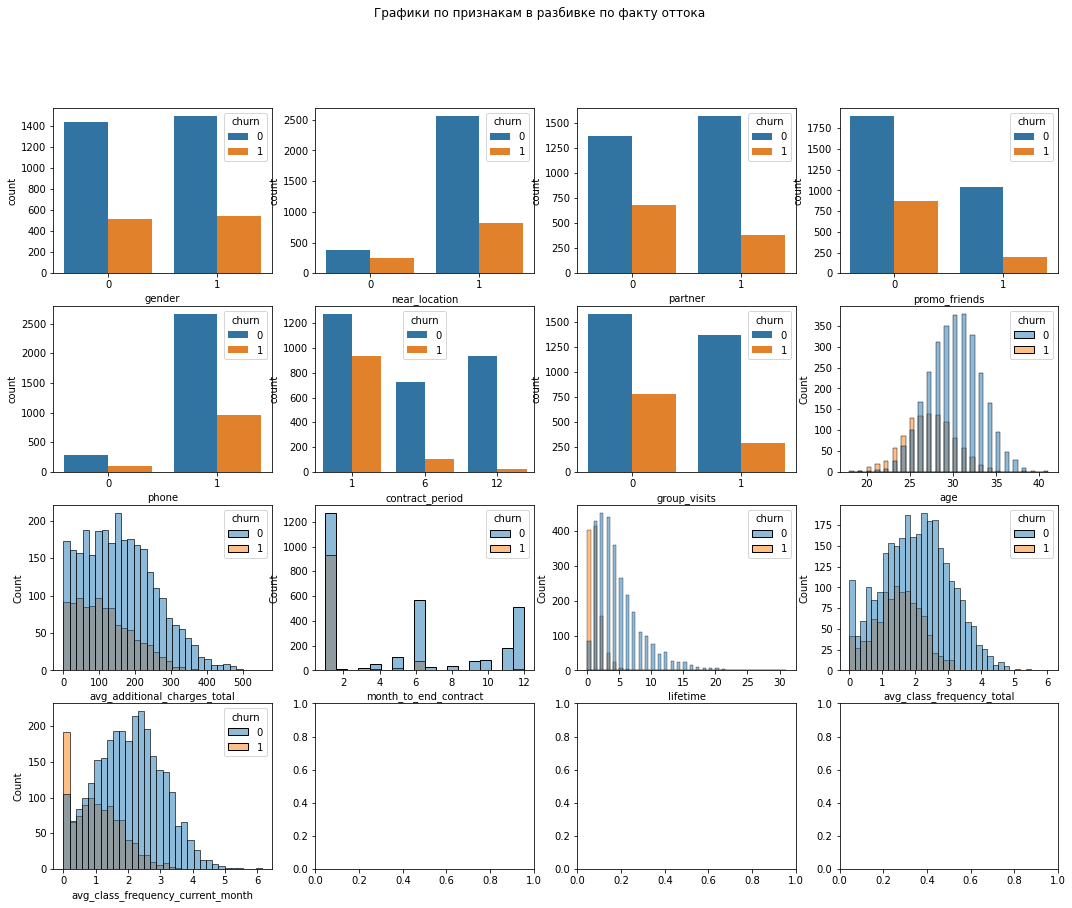

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(18,14))
fig.suptitle('Графики по признакам в разбивке по факту оттока')
sns.countplot(ax=axes[0, 0], data=data, x='gender', hue='churn')
sns.countplot(ax=axes[0, 1], data=data, x='near_location', hue='churn')
sns.countplot(ax=axes[0, 2], data=data, x='partner', hue='churn')
sns.countplot(ax=axes[0, 3], data=data, x='promo_friends', hue='churn')
sns.countplot(ax=axes[1, 0], data=data, x='phone', hue='churn')
sns.countplot(ax=axes[1, 1], data=data, x='contract_period', hue='churn')
sns.countplot(ax=axes[1, 2], data=data, x='group_visits', hue='churn')
sns.histplot(ax=axes[1, 3], data=data, x='age', hue='churn')
sns.histplot(ax=axes[2, 0], data=data, x='avg_additional_charges_total', hue='churn')
sns.histplot(ax=axes[2, 1], data=data, x='month_to_end_contract', hue='churn')
sns.histplot(ax=axes[2, 2], data=data, x='lifetime', hue='churn')
sns.histplot(ax=axes[2, 3], data=data, x='avg_class_frequency_total', hue='churn')
sns.histplot(ax=axes[3, 0], data=data, x='avg_class_frequency_current_month', hue='churn')

plt.show()

ВЫВОД:
- по полу распределение практически одинаковое
- по близости к работе/дому можно заметить, что чаще уходят люди которые живут/работают далеко от зала
- люди по пртнерской программе удерживаются лучше
- люди, пришедшие по программе "приведи друга" удерживаются лучше
- чаще уходят люди с контрактами на 1 месяц, чем дольше контракт тем выше удержание
- те, кто уходит, реже ходят на групповые занятия
- с молодые чаще бросают, хотя в обоих случаях распределение нормальное
- те кто уходят тратят меньше денег на доп услуги 
- чаще бросают те, у кого контракт на 1 месяц
- часто бросившие не ходили в зал совсем, их лайфтайм = 0
- бросающие зал реже там появляются, а в текущий месяц посещения стремятся к нулю

### Матрица корреляции

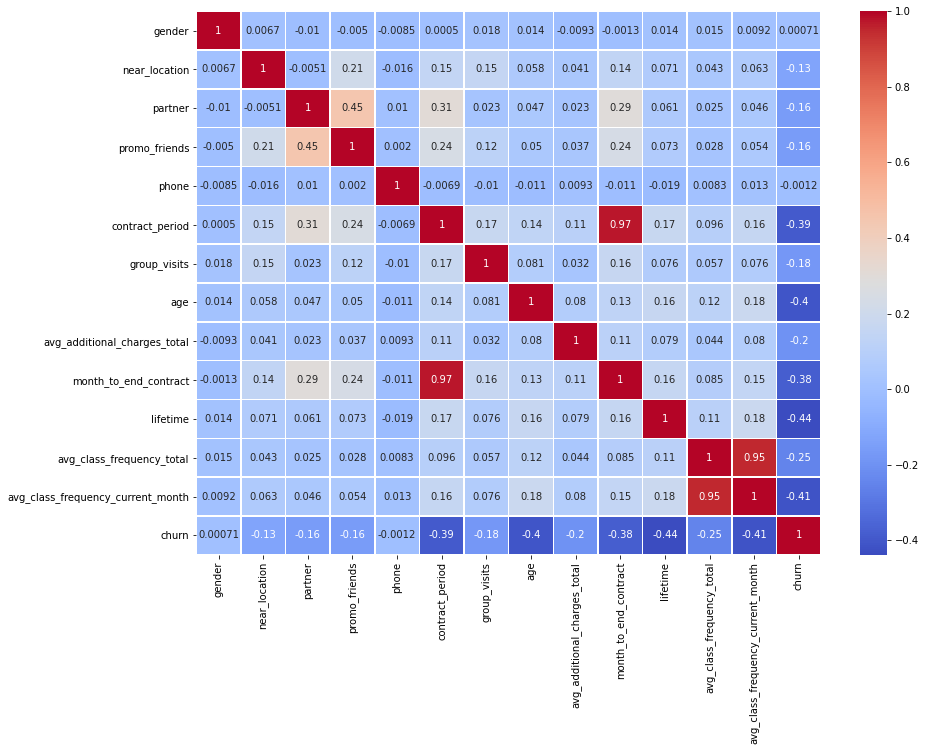

In [10]:
cm = data.corr()
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(cm, annot=True, linewidths=.5, cmap='coolwarm')
plt.Figure(figsize=(12,12))
plt.show()

### ВЫВОД
на матрице можем наблюдать мультиколлинеарность. У нас есть группа признаков (month_to_end_contract и contract_period, avg_class_frequency_current_month и avg_class_frequency_total), которые обладают сильной линейной зависимостью, что может исказить нашу модель. 
Чтобы избавиться от мультиколлинеарности, можно удалить из датафрейма один из парных столбцов, или применить L1 или L2 регрессии. Поскольку у нас это всего пару столбцов, просто удалим их вручную.


In [11]:
data_cor = data.drop(['avg_class_frequency_current_month', 'month_to_end_contract'], axis=1)
data_cor.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total',
       'churn'],
      dtype='object')

## Модель прогнозирования оттока клиентов

Разделим данные на матрицу признаков и целевую переменную

In [12]:
X = data_cor.drop('churn', axis=1)
y = data_cor['churn']

Разделим модель на обучающую и валидационную выборку

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Зададим модели для обучения

In [14]:
models = [
    LogisticRegression(),
    RandomForestClassifier()
]

Обучим модели и оценим их по метрикам, оценим какая модель показала себя лучше.

In [15]:
def make_prediction(m, X_train, y_train, X_test, y_test, random_state=0):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test, random_state=0)

LogisticRegression()
Accuracy:0.87 Precision:0.73 Recall:0.76
RandomForestClassifier()
Accuracy:0.90 Precision:0.80 Recall:0.78


Выше видно, что модель, обученная случайным лесом показала себя лучше, чем логистической регрессией.

## Кластеризация клиентов

Стандартизируем данные


In [16]:
scaler = StandardScaler()
data_st = scaler.fit_transform(data)

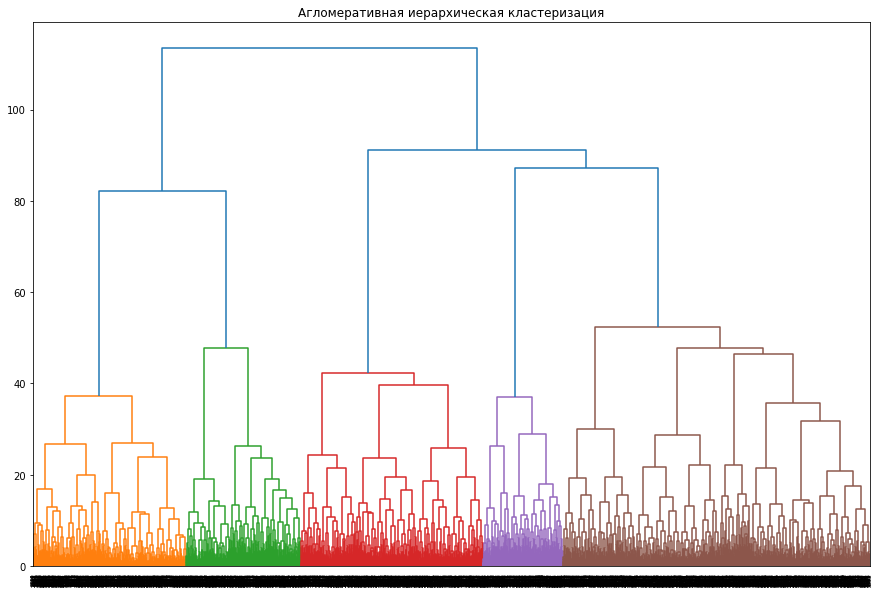

In [17]:
linked = linkage(data_st, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Агломеративная иерархическая кластеризация')
plt.show() 

Предложенное оптимальное число кластеров - 5

##### теперь обучим модель кластеризации на основании алгоритма K-Means. Число кластеров возьмем согласно предложенному выше - 5. И посмотрим на средние по кластерам


In [18]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(data_st)
data['cluster_km'] = labels
print(data.groupby('cluster_km').agg({'gender': 'count'}).T) # проверим размеры кластером на статистическую значимость
cluster_features = data.groupby('cluster_km').mean().reset_index()
numeric_columns = cluster_features.drop(columns=['cluster_km']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)
cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

cluster_km    0    1    2     3    4
gender      544  767  821  1180  688


,0,1,2,3,4
cluster_km,0.00,1.00,2.00,3.00,4.00
gender,0.50,0.49,0.51,0.52,0.52
near_location,0.00,0.94,1.00,1.00,0.97
partner,0.46,0.76,0.32,0.28,0.74
promo_friends,0.08,0.53,0.21,0.21,0.53
phone,0.92,0.92,0.90,0.90,0.87
contract_period,2.07,10.45,1.55,1.88,8.86
group_visits,0.21,0.52,0.29,0.45,0.53
age,28.52,29.96,26.93,30.24,29.73
avg_additional_charges_total,132.74,161.85,113.17,157.99,162.91


### Нанесем графики попарных признаков по кластерам

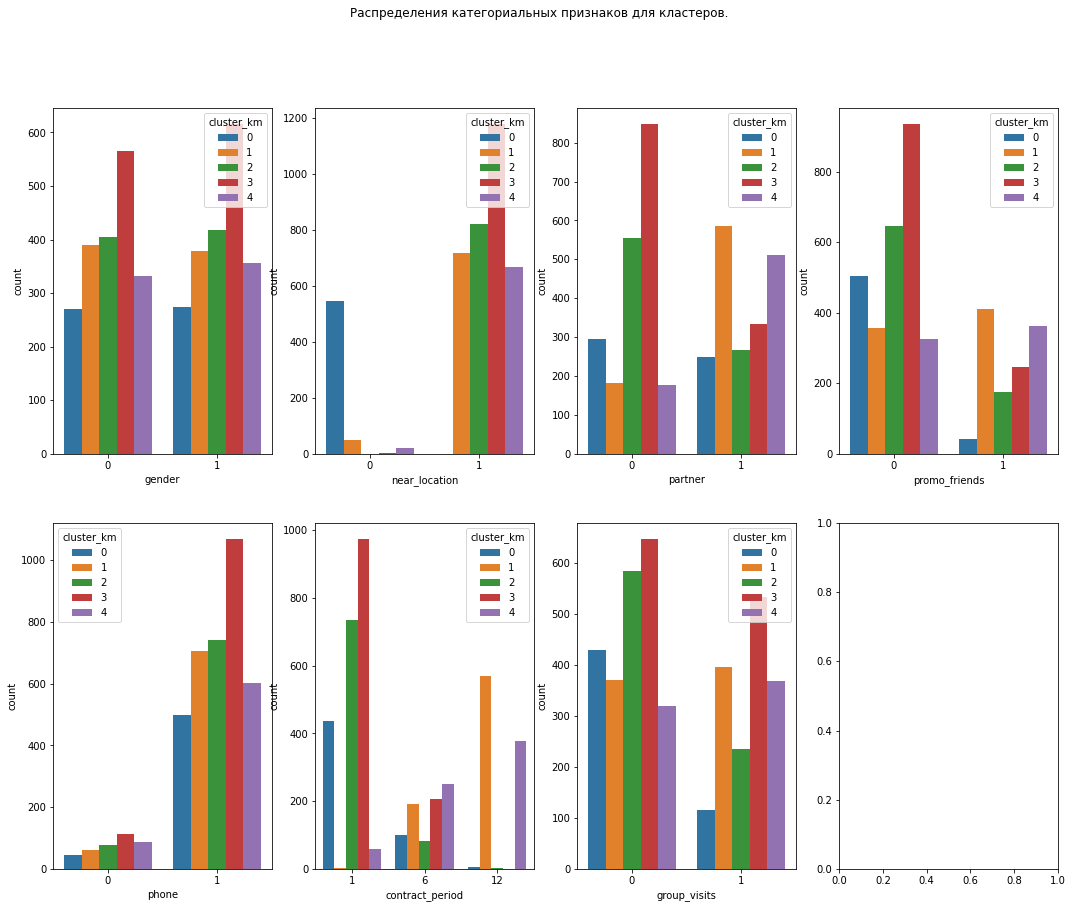

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(18,14))
fig.suptitle('Распределения категориальных признаков для кластеров.')
sns.countplot(ax=axes[0, 0], data=data, x='gender', hue='cluster_km')
sns.countplot(ax=axes[0, 1], data=data, x='near_location', hue='cluster_km')
sns.countplot(ax=axes[0, 2], data=data, x='partner', hue='cluster_km')
sns.countplot(ax=axes[0, 3], data=data, x='promo_friends', hue='cluster_km')
sns.countplot(ax=axes[1, 0], data=data, x='phone', hue='cluster_km')
sns.countplot(ax=axes[1, 1], data=data, x='contract_period', hue='cluster_km')
sns.countplot(ax=axes[1, 2], data=data, x='group_visits', hue='cluster_km')

plt.show()

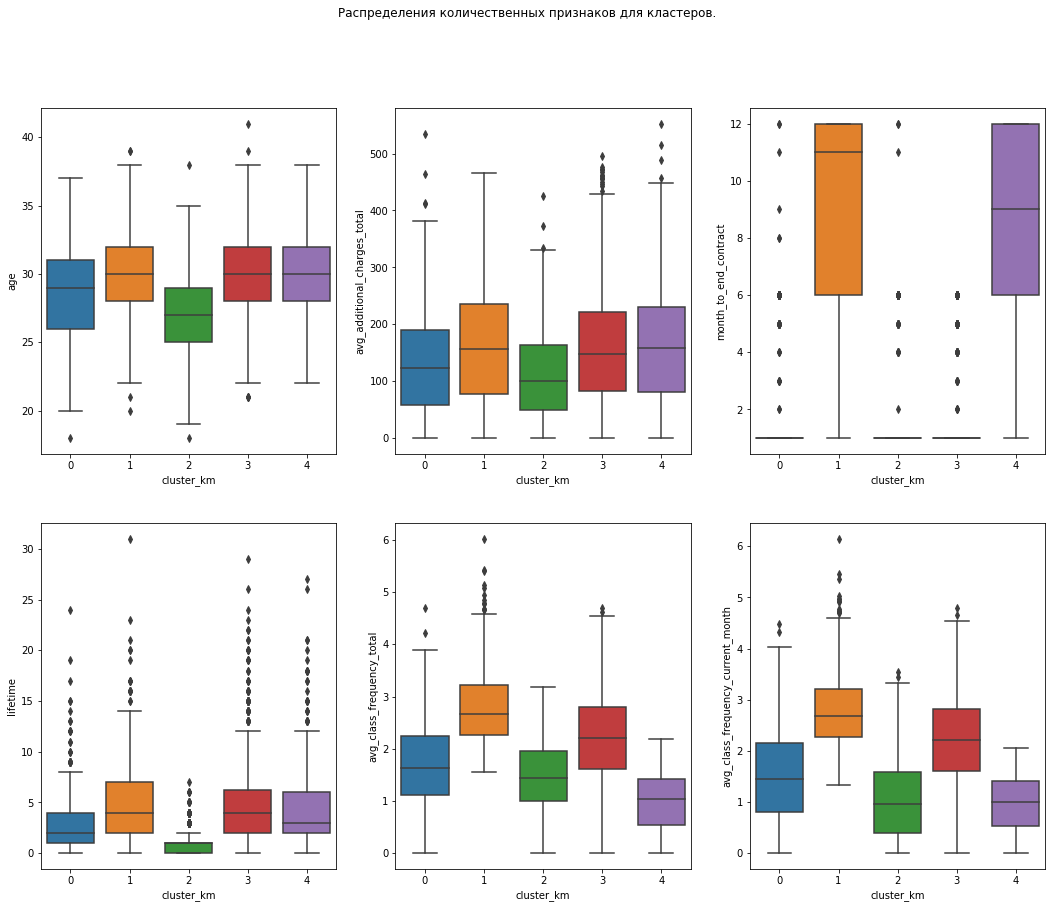

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18,14))
fig.suptitle('Распределения количественных признаков для кластеров.')
sns.boxplot(ax=axes[0, 0], data=data, x='cluster_km', y='age')
sns.boxplot(ax=axes[0, 1], data=data, y='avg_additional_charges_total', x='cluster_km')
sns.boxplot(ax=axes[0, 2], data=data, y='month_to_end_contract', x='cluster_km')
sns.boxplot(ax=axes[1, 0], data=data, y='lifetime', x='cluster_km')
sns.boxplot(ax=axes[1, 1], data=data, y='avg_class_frequency_total', x='cluster_km')
sns.boxplot(ax=axes[1, 2], data=data, y='avg_class_frequency_current_month', x='cluster_km')
plt.show()

### ВЫВОД:

Ну тут нас больше интересуют 2 кластера - это 2 кластер с оттоком 0,95 и 0 кластер с оттоком 0,45. 
- Сразу, что бросается в глаза это траты на доп услуги, эти кластеры тратят меньше остальных 
- чаще уходят молодые
- часто люди бросают заниматься за пару месяцев до истечения договора, возможно это сезонное явление
- уходящие меньше посещают групповые занятия
- уходят те, кто редко ходит из-за удаленности зала
- чаще уходят те у кого краткосрочные договора
- уходят те, кто пришел сам, а не по партнерке или рекомендации

Портреты проблемных кластеров:
- 0: молодые, далеко живут, приходят сами или по партнерке, имеют краткосрочные договора, ходят редко(возможно связано с отдаленностью), не пользуются допуслугами зала
- 2: самый молодой кластер, приходят в основном сами, имеют короткие договора, живут/работают рядом, но ходят редко и как правило бросают уже после первого месяца, также не пользуются допуслугами зала.

### Рекомендации:
- приведи друга и партнерка
- продвижение групповых занятий, допуслуг зала
- продижение длинных договоров (12 месяцев)
- мотивирущие рассылки тем, кто редко ходит в зал
- акции, направленные на продление договора для тех, у кого он скоро заканчивается

In [21]:
data.groupby('cluster_km').agg({'churn':'mean'})

,churn
cluster_km,
0,0.450368
1,0.007823
2,0.961023
3,0.003390
4,0.024709


## Вывод:
Итак:
- мы изучили данные, проверили на пропуски
- изучили признаки в разбивке по классам
- построили матрицу корреляций и минимизировали мультиколлинеарность, удалив столбцы с сильно созависимыми признаками
- разбили выборку на трейн и тест
- обучили модели, померяли метриками, нашли оптимальную
- далее мы стандартизировали данные
- провели Агломеративную иерархическую кластеризацию, которая показала оптимальное количество кластеров по имеющимся признакам
- далее обучили модель кластеризации на основании алгоритма K-Means, вывели средние признаков по кластерам
- вывявили особенности кластеров, составили портреты проблемных кластеров
- дали рекомендации на основе выявленных признаков.